<a href="https://colab.research.google.com/github/Bae-hong-seob/University-3-1/blob/main/visual_computing/visual_computing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5/4 수업내용 기말고사 시작

중간고사 답
1. aperture shutter speed 맞음 1문제  
2. 남자 두 어깨동무 - WB, gamma 틀림   
3. red filter 눈동자 제외 영역에 칠해야됨 틀림  
4. 주관식 Global HE, Adaptive HE 맞음  
5. harris corner detect틀린거 모두(5개)고르시오 -> 틀림
6. featrue 디텍터 틀린거 모두고르시오 하나맞춤 -> 틀림
7. low-pass, high-pass filter -> 맞음
8. interpolation 맞음
9. 계산 0,0.2,-0.2,0.8,5 -> 맞음
10. stitch -> 맞음

# Feature Description  

지난시간 배웠던 내용 간략하게 review  
6page에 R이 다른거임. 그래프에 있는 R은 cornerness  
Harris corner detector 는 blob detector에 비해 비싼 연산임. 무거움  

differential : 미분  
가우시안 피라미드 - upsample = DOG
DOG, LOG 따질 떄 , DOG(n level) - upsample DOG(n-1 level) 한게
LOG와 비슷하다.  

이해
> 라플라시안 필터는 다양한 크기의 blob detector가 적용된 결과다.  

local extrema로 DOG 영상에서 blob 후보군을 설정함.  
여러 크기 region에 대해 후보군을 만들어서 local extrema의 사진들을 합집합으로 라플라시안 필터를 만듬.  

16page summary  


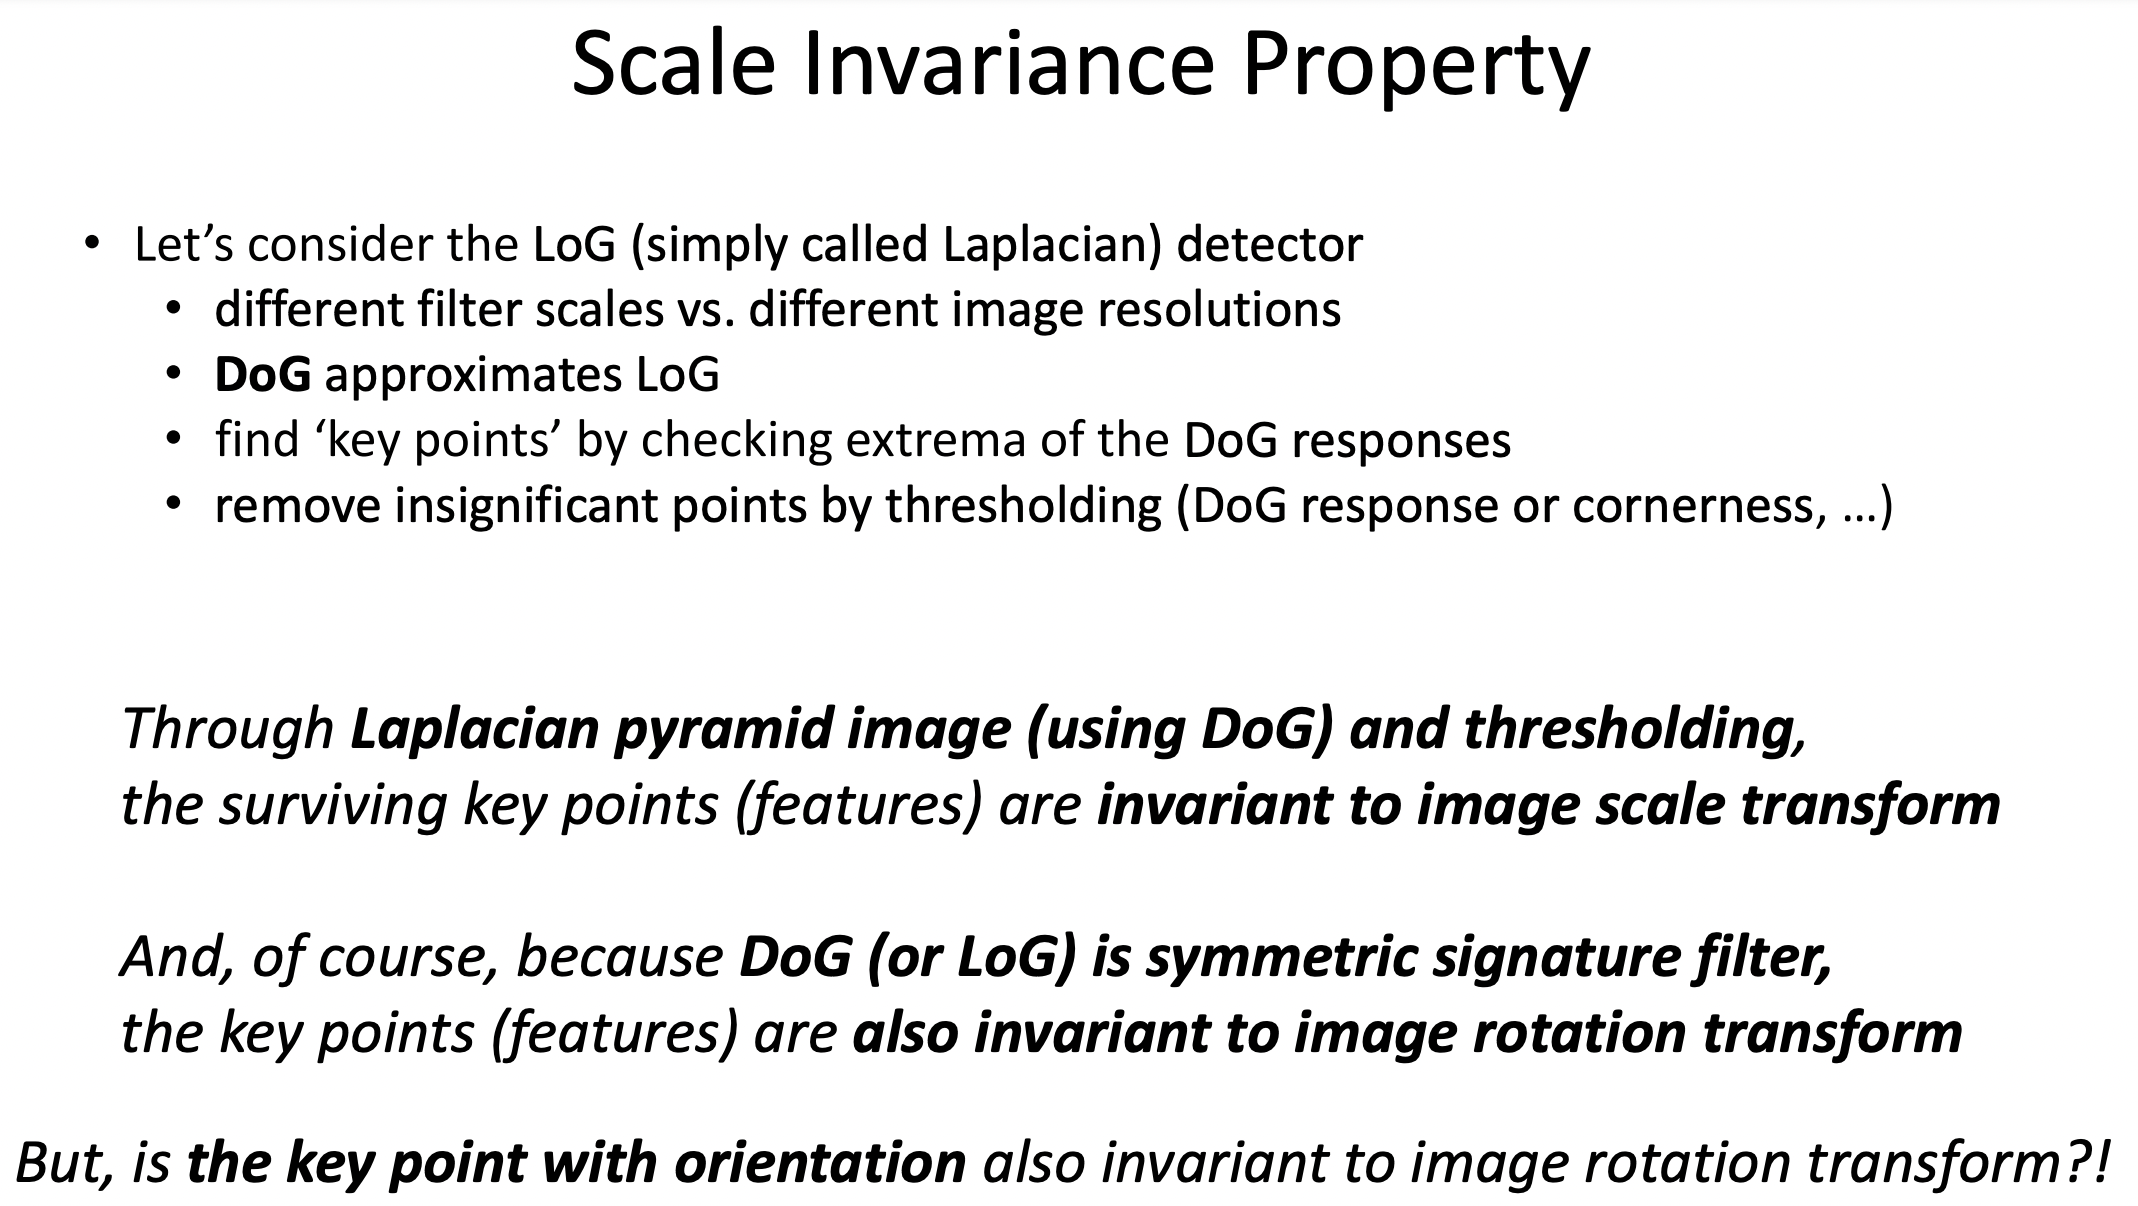

# 5/9 수업내용

Harris corner detector 는 intensity scale에 대해서 invarirant 하다.  
• Harris corner detector is invariant to image rotation  
• Harris corner detector is partially invariant to image intensity change -> 왜? 알아내야함  
• Harris corner detector is not invariant to image scale  
> • but applying different filter scale (relative to image resolution) can achieve scale- invariant property!  

local extrema로 blob을 filter  
> 그 후에 threshold도 적용시킬 수 있음 -> feature selection  
> threshold는 local extrema

Harris corner detector를 blob필터도 있는데 쓰는 이유
> rotation에 대해 Invariant 속성 때문에.  
> 이때 둘 다 rotation에 대해 Invariant하지만 Harris corner detector의 경우 방향(orientation)에 대한 정보도 있기 때문에.  
> Blob filter의 경우 단순 corner detect는 수행하지만 eigenvector가 존재하지 않기 때문에 방향에 대한 정보는 주지 않음.  

16page
> Through Laplacian pyramid image (using DoG) and thresholding,
the surviving key points (features) are invariant to image scale transform. 
> 여기서 and thresholding 삭제. 

Gussian filter를 취하면 수학적으로 활용할 수 있는 부분이 많다.  
따라서 일단 구한 값에다가 Gussian filter를 취하고 보는 경우도 종종 있음  

pixel 주변에 변화량에 따라 eigen vector를 결정한다.  
모든 E(u,v)를 계산하는 Harris corner detecotr와는 살짝 다름.  
조금 더 라이트한 연산을 활용하여 orientation을 구함.  

weighted by gaussian kernel. 해당 pixel을 중심으로 주변에다가 가중치를 주게 됨.  


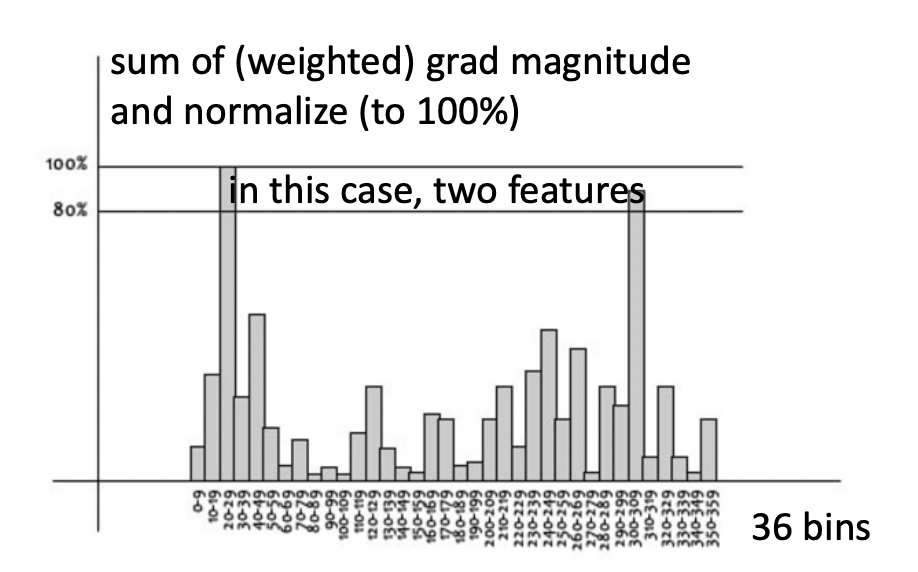

전체 vector의 방향 360도 에 대한 결과들.  
이때 y 값은 (각 방향에 대한 vecotr의 크기) 들의 합  

결국 전체 영상에 대해서 vector들을 히스토그램으로 정해봄.  
한 픽셀의 주 vecotr를 정하기 위한 방법. 
> 하지만 bins에 대해 vector를 정하기 때문에 각도가 하나로 딱 정해지지 않는다.  
> ex) 30~39도 사이에 feature vector를 정한다.  
> Harris corner detector에 비해 세밀한 부분에선 조금 떨어지지만 매우 싼 연산이 강점이다.  

## 지금까지의 공부내용은 다음의 task를 수행하기 위함임.  

# Feature에 ID를 부여  
... rotation invariant한 feature를 만들 수 있다!!!

# 5/11 수업내용

## feature Descriptor. 

orientation(방향) of key points  
16x16 사이즈의 window창에 대해 4x4의 세밀한 tile로 나누게 되고, 각 tile에서는 360도에 대해 8개의 방향(45도)에 대해 orientation의 크기를 나타내어 그 합이 한 tile의 orientation이 된다.  
> 중요한건 rotation invariant  
> 이때까지 배운건 Harris corner detector, Blob detector.  
> 지금은 angle histogram을 써서 orientation을 구함(rotation invariant)를 만족하기 위해  

기준축(x)축에 대해 angle을 설정함.  
만약 orientation이 40도로 나왔다면, 각 tile에서 x축이 아닌 40도를 기준축으로 하여 각도를 다시 histogram으로 표현함.  

현재 feature는 선별 되었고, feature에 ID를 주는 과정  

해당 feature decriptor는 scale invariant하다.  
> 왜?  
feature detect과정에서 알맞는 scale을 정한채로 feature ID를 부여하는 과정을 진행하기 떄문에 이미 feautre를 구분할 수 있는 알맞는 scale이 정해진 상태.  


우리는 DOG를 쓴다.  
Scale invariant를 위해 Laplacian pyramid를 사용  
shift 알고리즘 사용..?(orientation을 구하는 것)  

또한 MOPS decriptor도 소개함
> Multi-scale Oriented PatcheS descriptor  

SURF descriptor도 소개함  


## summary  

Feature Descriptor에 대해 배움(not Feature detector)  
Feature detector : Identify location key point.   

Feature Descriptor : Identify vector that differentiate one feature from others. 

Feature Descriptor의 속성  
> Invariance & discriminability  
> Invariance : Descriptors should NOT change even if image is transformed. 
> Discriminability : Descriptors should BE highly UNIQUE for each point. 


그래 feature를 detect 했고, ID를 부여했다 하자.  
그럼 다른 이미지에서 해당하는 feature가 존재하는지는 어떻게 찾나/?  
그래야 image stitch를 진행하지. or 비슷한 물체를 찾지  


